In [1]:
from __future__ import print_function
import keras
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.python.keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt #匯入matplotlib.pyplot模組

In [2]:
# 定義梯度下降批量
batch_size = 128
# 定義分類數量
num_classes = 10
# 定義訓練週期
epochs = 12

# 定義圖像寬、高
img_rows, img_cols = 28, 28

# 載入 MNIST 訓練資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 保留原始資料，供 cross tab function 使用
y_test_org = y_test

11490434/11490434 [==============================] - 35s 3us/step


In [4]:
#建立plot_image函數，顯示images數字影像
def plot_image(image): #定義plot_image函數，傳入image作為參數
    fig = plt.gcf() #設定顯示圖形的大小
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary') #傳入參數image、28*28像素的圖形，camp="binary"表示以黑白色顯示
    plt.show() #顯示圖片

In [5]:
# channels_first: 色彩通道(R/G/B)資料(深度)放在第2維度，第3、4維度放置寬與高
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else: # channels_last: 色彩通道(R/G/B)資料(深度)放在第4維度，第2、3維度放置寬與高
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 轉換色彩 0~255 資料為 0~1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# y 值轉成 one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [6]:
# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=32,即 output space 的深度, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 建立卷積層，filter=64,即 output size, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(64, (3, 3), activation='relu'))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model.add(Dropout(0.25))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model.add(Flatten())
# 全連接層: 128個output
model.add(Dense(256, activation='relu'))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.5
model.add(Dropout(0.5))
# 使用 softmax activation function，將結果分類
model.add(Dense(num_classes, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

In [7]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# 顯示損失函數、訓練成果(分數)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 66s 138ms/step - loss: 0.1853 - accuracy: 0.9439 - val_loss: 0.0432 - val_accuracy: 0.9859
Epoch 2/12
469/469 [==============================] - 70s 148ms/step - loss: 0.0651 - accuracy: 0.9807 - val_loss: 0.0364 - val_accuracy: 0.9889
Epoch 3/12
469/469 [==============================] - 66s 140ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.0324 - val_accuracy: 0.9892
Epoch 4/12
469/469 [==============================] - 64s 137ms/step - loss: 0.0365 - accuracy: 0.9884 - val_loss: 0.0296 - val_accuracy: 0.9902
Epoch 5/12
469/469 [==============================] - 65s 138ms/step - loss: 0.0330 - accuracy: 0.9890 - val_loss: 0.0259 - val_accuracy: 0.9921
Epoch 6/12
469/469 [==============================] - 64s 136ms/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.0305 - val_accuracy: 0.9913
Epoch 7/12
469/469 [==============================] - 64s 137ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0291 - val_ac

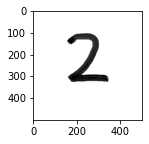

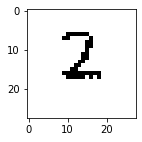

1/1 [==============================] - 0s 286ms/step
[3]


In [9]:
from PIL import Image
import numpy as np

#轉換成黑白圖片
img = Image.open("2.png").convert('1')
plot_image(img)

#顯示原圖
new_img = img.resize((28,28))
plot_image(new_img)

#將圖片轉換為陣列
img2arr = np.array(new_img)
# img2arr = img2arr.astype('float32')
# img2arr /= 255
img2arr = np.expand_dims(img2arr, axis=0) #模擬出有很多圖片的樣子
img2arr = np.expand_dims(img2arr, axis=3) #通道只有一層

# img2arr.shape
prediction = np.argmax(model.predict(img2arr), axis=-1)
print(prediction)